# House Prices competition - Advanced Regression Techniques

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#train set 
df1 = pd.read_csv('train_advanced.csv')
#test set 
df2 = pd.read_csv('test_advanced.csv')

In [3]:
df1.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [12]:
df1.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [13]:
df1.shape

(1460, 81)

In [14]:
df1.isnull().sum().sum()

6965

In [15]:
df2

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [16]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [17]:
df2.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [18]:
df1.shape

(1460, 81)

In [19]:
df2.isnull().sum().sum()

7000

# Preprocess the data

In [20]:
#Fill missing values for "train set"
df1['LotFrontage']=df1['LotFrontage'].fillna(df1['LotFrontage'].mean())
df1.drop(['Alley'],axis=1,inplace=True)
df1['BsmtCond']=df1['BsmtCond'].fillna(df1['BsmtCond'].mode()[0])
df1['BsmtQual']=df1['BsmtQual'].fillna(df1['BsmtQual'].mode()[0])
df1['FireplaceQu']=df1['FireplaceQu'].fillna(df1['FireplaceQu'].mode()[0])
df1['GarageType']=df1['GarageType'].fillna(df1['GarageType'].mode()[0])
df1.drop(['GarageYrBlt'],axis=1,inplace=True)
df1['GarageFinish']=df1['GarageFinish'].fillna(df1['GarageFinish'].mode()[0])
df1['GarageQual']=df1['GarageQual'].fillna(df1['GarageQual'].mode()[0])
df1['GarageCond']=df1['GarageCond'].fillna(df1['GarageCond'].mode()[0])
df1.drop(['PoolQC','Fence','MiscFeature'],axis=1,inplace=True)
df1.drop(['Id'],axis=1,inplace=True)
df1['MasVnrType']=df1['MasVnrType'].fillna(df1['MasVnrType'].mode()[0])
df1['MasVnrArea']=df1['MasVnrArea'].fillna(df1['MasVnrArea'].mode()[0])
df1['BsmtExposure']=df1['BsmtExposure'].fillna(df1['BsmtExposure'].mode()[0])
df1['BsmtFinType2']=df1['BsmtFinType2'].fillna(df1['BsmtFinType2'].mode()[0])
df1['BsmtFinType1']=df1['BsmtFinType1'].fillna(df1['BsmtFinType1'].mode()[0])
df1['Electrical']=df1['Electrical'].fillna(df1['Electrical'].mode()[0])


In [21]:
df1.isnull().sum().sum()

0

In [22]:
#Fill missing values for "test set"
df2['LotFrontage']=df2['LotFrontage'].fillna(df2['LotFrontage'].mean())
df2.drop(['Alley'],axis=1,inplace=True)
df2['BsmtCond']=df2['BsmtCond'].fillna(df2['BsmtCond'].mode()[0])
df2['BsmtQual']=df2['BsmtQual'].fillna(df2['BsmtQual'].mode()[0])
df2['FireplaceQu']=df2['FireplaceQu'].fillna(df2['FireplaceQu'].mode()[0])
df2['GarageType']=df2['GarageType'].fillna(df2['GarageType'].mode()[0])
df2.drop(['GarageYrBlt'],axis=1,inplace=True)
df2['GarageFinish']=df2['GarageFinish'].fillna(df2['GarageFinish'].mode()[0])
df2['GarageQual']=df2['GarageQual'].fillna(df2['GarageQual'].mode()[0])
df2['GarageCond']=df2['GarageCond'].fillna(df2['GarageCond'].mode()[0])
df2.drop(['PoolQC','Fence','MiscFeature'],axis=1,inplace=True)
df2.drop(['Id'],axis=1,inplace=True)
df2['MasVnrType']=df2['MasVnrType'].fillna(df2['MasVnrType'].mode()[0])
df2['MasVnrArea']=df2['MasVnrArea'].fillna(df2['MasVnrArea'].mode()[0])
df2['BsmtExposure']=df2['BsmtExposure'].fillna(df2['BsmtExposure'].mode()[0])
df2['BsmtFinType2']=df2['BsmtFinType2'].fillna(df2['BsmtFinType2'].mode()[0])
df2['SaleType']=df2['SaleType'].fillna(df2['SaleType'].mode()[0])
df2['Utilities']=df2['Utilities'].fillna(df2['Utilities'].mode()[0])
df2['MSZoning']=df2['MSZoning'].fillna(df2['MSZoning'].mode([0]))
df2['Exterior1st']=df2['Exterior1st'].fillna(df2['Exterior1st'].mode()[0])
df2['Exterior2nd']=df2['Exterior2nd'].fillna(df2['Exterior2nd'].mode()[0])
df2['BsmtFinType1']=df2['BsmtFinType1'].fillna(df2['BsmtFinType1'].mode()[0])
df2['BsmtFinSF1']=df2['BsmtFinSF1'].fillna(df2['BsmtFinSF1'].mean())
df2['BsmtFinSF2']=df2['BsmtFinSF2'].fillna(df2['BsmtFinSF2'].mean())
df2['BsmtUnfSF']=df2['BsmtUnfSF'].fillna(df2['BsmtUnfSF'].mean())
df2['TotalBsmtSF']=df2['TotalBsmtSF'].fillna(df2['TotalBsmtSF'].mean())
df2['BsmtFullBath']=df2['BsmtFullBath'].fillna(df2['BsmtFullBath'].mean())
df2['BsmtHalfBath']=df2['BsmtHalfBath'].fillna(df2['BsmtHalfBath'].mean())
df2['KitchenQual']=df2['KitchenQual'].fillna(df2['KitchenQual'].mode()[0])
df2['Functional']=df2['Functional'].fillna(df2['Functional'].mode()[0])
df2['GarageCars']=df2['GarageCars'].fillna(df2['GarageCars'].mean())
df2['GarageArea']=df2['GarageArea'].fillna(df2['GarageArea'].mean())
df2['MSZoning']=df2['MSZoning'].fillna(df2['MSZoning'].mode()[0])

In [26]:
df2.isnull().sum().sum()

0

<AxesSubplot:>

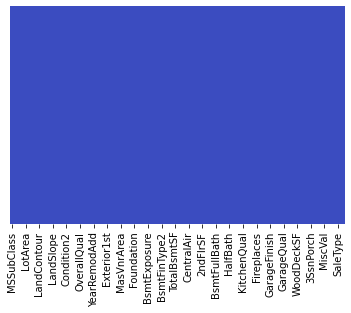

In [30]:
sns.heatmap(df2.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')

In [31]:
#handle the categorical variables
from sklearn.preprocessing import OneHotEncoder
columns=['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood',
         'Condition2','BldgType','Condition1','HouseStyle','SaleType',
        'SaleCondition','ExterCond',
         'ExterQual','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
        'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Heating','HeatingQC',
         'CentralAir',
         'Electrical','KitchenQual','Functional',
         'FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive']

In [32]:
len(columns)

39

In [33]:
def category_onehot_multcols(multcolumns):
    df_final=final_df
    i=0
    for fields in multcolumns:
        
        print(fields)
        df1=pd.get_dummies(final_df[fields],drop_first=True)
        
        final_df.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:
            
            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1
       
        
    df_final=pd.concat([final_df,df_final],axis=1)
        
    return df_final

In [34]:
main_df=df1.copy()

In [35]:
df2.shape

(1459, 74)

In [36]:
final_df=pd.concat([df1,df2],axis=0)

In [37]:
final_df['SalePrice']


0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
          ...   
1454         NaN
1455         NaN
1456         NaN
1457         NaN
1458         NaN
Name: SalePrice, Length: 2919, dtype: float64

In [38]:
final_df.shape

(2919, 75)

In [39]:
final_df=category_onehot_multcols(columns)

MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition2
BldgType
Condition1
HouseStyle
SaleType
SaleCondition
ExterCond
ExterQual
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive


In [40]:
final_df.shape

(2919, 236)

In [41]:
#final_df =final_df.loc[:,~final_df.columns.duplicated()]

In [42]:
final_df.shape

(2919, 236)

In [43]:
df_Train=final_df.iloc[:1459,:]
df_Test=final_df.iloc[1460:,:]

In [44]:
df_Train.shape

(1459, 236)

In [45]:
df_Test.drop(['SalePrice'],axis=1,inplace=True)

C:\Users\admin\AppData\Local\Temp\ipykernel_5176\3985304647.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Test.drop(['SalePrice'],axis=1,inplace=True)


In [46]:
X_train=df_Train.drop(['SalePrice'],axis=1)
y_train=df_Train['SalePrice']

In [47]:
#df_Test.drop(['SalePrice'],axis=1,inplace=True)

In [48]:
df_Train.shape

(1459, 236)

In [49]:
df_Test.isnull().sum().sum()

0

In [50]:
df_Test.shape

(1459, 235)

In [57]:
X_test = df_Test

# Artificial Neural Network Implementation

In [58]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(hidden_layer_sizes=(200,), activation='relu', solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True)

In [59]:
model.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(200,))

In [60]:
y_pred = model.predict(X_test)
y_pred

array([146800., 190000., 187500., ..., 168000., 127500., 173000.])

In [61]:
from sklearn.metrics import mean_squared_error

In [62]:
score = model.score(X_test, y_pred)

In [63]:
score

1.0

In [64]:
from math import sqrt

In [65]:
np.sqrt(mean_squared_error(y_train,y_pred))

111595.3789201218